---
This notebook generates image variants from the vanilla SVG cards.

---

In [5]:
import multiprocessing
import os
import random
import sys
import numpy as np
from PIL import Image, ImageFilter


# Setup input and output directories.
input_directory = 'card-images'
output_directories = ('rgba-images', 'greyscaled-images', 'rgba-data', 'greyscaled-data')
for output_directory in output_directories:
  if not os.path.exists(output_directory):
    os.makedirs(output_directory)
  
# Cropping and resizing params.
original_card_width, original_card_height = 352, 550
card_width, card_height = 150, 150

# White balance, rotation and blur params.
min_channel_high_end = 0.4
max_channel_low_end = 0.4
max_rotation = 10
max_blur = 3

# Seed the rng.
random.seed(2)


def preprocess(input_path):
  """Preprocess images."""
  # Load.
  image = Image.open(input_path)
  
  # Crop.
  image = image.crop((0, 0, original_card_width, original_card_height))
  
  # Adjust white balance.
  rmin = random.random()*min_channel_high_end
  gmin = random.random()*min_channel_high_end
  bmin = random.random()*min_channel_high_end
  rmax = random.random()*max_channel_low_end + 1 - max_channel_low_end
  gmax = random.random()*max_channel_low_end + 1 - max_channel_low_end
  bmax = random.random()*max_channel_low_end + 1 - max_channel_low_end
  new_image = np.empty((original_card_height, original_card_width, 3), dtype=np.float32)
  image = np.multiply(np.array(image), 1/255.)
  new_image[:, :, 0] = np.add(np.multiply(image[:, :, 0], (rmax-rmin)), rmin)
  new_image[:, :, 1] = np.add(np.multiply(image[:, :, 1], (gmax-gmin)), gmin)
  new_image[:, :, 2] = np.add(np.multiply(image[:, :, 2], (bmax-bmin)), bmin)
  new_image = np.multiply(new_image, 255)
  image = Image.fromarray(np.uint8(new_image))
    
  # Rotate.
  rotation = random.choice([-1, 1]) * max_rotation * random.random()
  if rotation < 0:
    rotation += 360
  image = image.rotate(rotation, expand=True, resample=Image.BICUBIC)
  
  # Resize.
  image = image.resize((card_width, card_height), resample=Image.ANTIALIAS)
  
  # Blur.
  blur = max_blur * random.random()
  image = image.filter(ImageFilter.GaussianBlur(blur))
  
  # Greyscale.
  greyscaled_image = image.convert('L')
  
  # Get data.
  rgba_data = np.array(image).flatten()
  greyscaled_data = np.array(greyscaled_image).flatten()
  
  # Parse the input path.
  filename = input_path.split('/')[-1]
  number = filename.split('-')[0]
  color = filename.split('-')[1]
  texture = filename.split('-')[2]
  shape = filename.split('-')[3].split('.png')[0]
  
  # Save.
  output_filename_base = '%s-%s-%s-%s' % (number, color, texture, shape)
  output_filename_base += '-%0.2frmin-%0.2fgmin-%0.2fbmin-%0.2frmax-%0.2fgmax-%0.2fbmax' % (
    rmin, gmin, bmin, rmax, gmax, bmax)
  output_filename_base += '-%0.2fdeg' % rotation
  output_filename_base += '-%0.2fblur' % blur
  rgba_image_path = os.path.join('rgba-images', '%s.png' % output_filename_base)
  image.save(rgba_image_path)
  greyscaled_image_path = os.path.join('greyscaled-images', '%s.png' % output_filename_base)
  greyscaled_image.save(greyscaled_image_path)
  rgba_data_path = os.path.join('rgba-data', '%s.png' % output_filename_base)
  np.save(rgba_data_path, rgba_data)
  greyscaled_data_path = os.path.join('greyscaled-data', '%s.png' % output_filename_base)
  np.save(greyscaled_data_path, greyscaled_data)


# Input params.
image_paths = [os.path.join(input_directory, f) for f in os.listdir(input_directory)]
variations_per_image = 3
inputs = image_paths * variations_per_image

# Run it.
print 'generating %s images..' % len(inputs)
pool = multiprocessing.Pool()
for i, _ in enumerate(pool.imap_unordered(preprocess, inputs, 1)):
  sys.stdout.write('\r%0.1f%% complete..' % (100. * i / len(inputs)))
pool.close()
pool.join()
sys.stdout.write('\r100% complete.')

['card-images/2-purple-striped-diamond.png', 'card-images/3-red-empty-bean.png', 'card-images/1-red-solid-bean.png', 'card-images/3-purple-solid-oval.png', 'card-images/1-red-empty-diamond.png', 'card-images/1-green-striped-oval.png', 'card-images/1-purple-solid-bean.png', 'card-images/1-green-solid-diamond.png', 'card-images/3-red-solid-bean.png', 'card-images/2-green-solid-bean.png', 'card-images/1-red-striped-oval.png', 'card-images/2-green-striped-bean.png', 'card-images/3-green-striped-diamond.png', 'card-images/3-red-striped-bean.png', 'card-images/2-purple-solid-diamond.png', 'card-images/2-green-empty-bean.png', 'card-images/2-purple-empty-diamond.png', 'card-images/1-purple-empty-oval.png', 'card-images/2-green-solid-diamond.png', 'card-images/3-green-empty-diamond.png', 'card-images/1-purple-solid-diamond.png', 'card-images/1-red-solid-oval.png', 'card-images/1-red-striped-bean.png', 'card-images/3-red-empty-diamond.png', 'card-images/2-purple-striped-bean.png', 'card-images/

---
Display a few.

---

2-green-empty-diamond-0.18rmin-0.36gmin-0.31bmin-0.70rmax-0.96gmax-0.99bmax-355.11deg-2.90blur.png


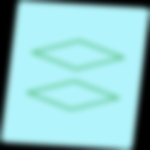

2-purple-striped-oval-0.10rmin-0.39gmin-0.16bmin-0.94rmax-0.71gmax-0.82bmax-7.99deg-0.24blur.png


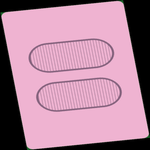

3-red-empty-diamond-0.05rmin-0.34gmin-0.16bmin-0.61rmax-0.66gmax-0.68bmax-355.76deg-0.58blur.png


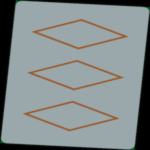

3-purple-solid-diamond-0.02rmin-0.28gmin-0.13bmin-0.99rmax-0.73gmax-0.98bmax-359.94deg-0.74blur.png


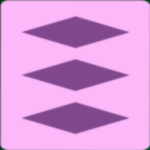

2-green-solid-oval-0.35rmin-0.36gmin-0.11bmin-0.82rmax-0.97gmax-0.61bmax-2.69deg-0.57blur.png


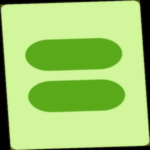

3-green-striped-bean-0.36rmin-0.18gmin-0.19bmin-0.85rmax-0.92gmax-0.79bmax-354.24deg-2.19blur.png


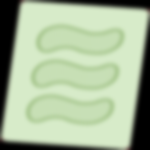

2-red-striped-bean-0.19rmin-0.01gmin-0.04bmin-0.64rmax-0.76gmax-0.76bmax-3.53deg-2.87blur.png


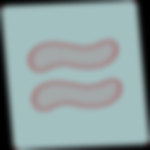

3-green-empty-oval-0.16rmin-0.22gmin-0.08bmin-0.62rmax-0.90gmax-0.94bmax-2.07deg-1.24blur.png


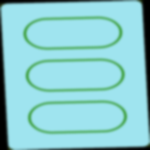

3-green-empty-bean-0.13rmin-0.22gmin-0.40bmin-0.84rmax-0.96gmax-0.88bmax-3.04deg-2.25blur.png


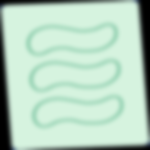

2-green-solid-diamond-0.06rmin-0.33gmin-0.18bmin-0.92rmax-0.73gmax-0.64bmax-1.50deg-2.78blur.png


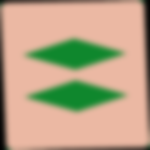

In [4]:
from IPython import display

output_directory = 'rgba-images'
images = random.sample(os.listdir(output_directory), 10)
for filename in images:
  print filename
  path = os.path.join(output_directory, filename)
  display.display(display.Image(filename=path))